In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
rushing = pd.read_csv("2018_NFL_Rushing_Stats.csv")
rushing = rushing.drop(columns=['Rk', 'Player', 'Tm'])
rushing.head()

,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,33,RB,16,16,251,1042,7,90,4.2,65.1,3


In [3]:
position_filter = (rushing["Pos"] == "RB") | (rushing["Pos"] == "WR") | (rushing["Pos"] == "QB")
rushing = rushing[position_filter]
rushing

,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,33,RB,16,16,251,1042,7,90,4.2,65.1,3
5,24,RB,16,15,250,935,9,42,3.7,58.4,2
6,24,RB,14,14,247,1151,9,61,4.7,82.2,3
7,22,RB,14,13,237,1168,8,51,4.9,83.4,0
8,24,RB,16,16,234,871,5,28,3.7,54.4,1
9,22,RB,16,16,219,1098,7,59,5.0,68.6,4


In [4]:
X = rushing.drop(columns = "Pos")
X.head()

,Age,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,23,15,15,304,1434,6,41,4.7,95.6,6
1,21,16,16,261,1307,11,78,5.0,81.7,0
2,27,16,16,258,940,7,53,3.6,58.8,3
3,24,14,14,256,1251,17,36,4.9,89.4,1
4,33,16,16,251,1042,7,90,4.2,65.1,3


In [5]:
y = rushing["Pos"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Text(193.15384615384616, 190.26, 'X[8] <= 4.8\nentropy = 0.653\nsamples = 233\nvalue = [59, 97, 77]'),
 Text(103.01538461538462, 135.9, 'X[1] <= 5.5\nentropy = 0.515\nsamples = 105\nvalue = [23, 14, 68]'),
 Text(51.50769230769231, 81.53999999999999, 'X[0] <= 27.5\nentropy = 0.595\nsamples = 31\nvalue = [17, 8, 6]'),
 Text(25.753846153846155, 27.180000000000007, 'entropy = 0.66\nsamples = 18\nvalue = [6, 7, 5]'),
 Text(77.26153846153846, 27.180000000000007, 'entropy = 0.272\nsamples = 13\nvalue = [11, 1, 1]'),
 Text(154.52307692307693, 81.53999999999999, 'X[3] <= 13.5\nentropy = 0.285\nsamples = 74\nvalue = [6, 6, 62]'),
 Text(128.76923076923077, 27.180000000000007, 'entropy = 0.187\nsamples = 69\nvalue = [2, 5, 62]'),
 Text(180.27692307692308, 27.180000000000007, 'entropy = 0.32\nsamples = 5\nvalue = [4, 1, 0]'),
 Text(283.2923076923077, 135.9, 'X[9] <= 4.5\nentropy = 0.495\nsamples = 128\nvalue = [36, 83, 9]'),
 Text(257.53846153846155, 81.53999999999999, 'X[7] <= 5.9\nentropy = 0.35

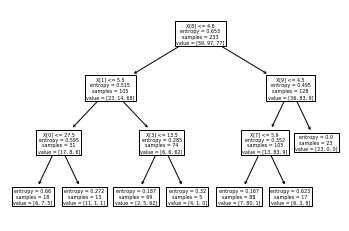

In [8]:
tree.plot_tree(clf)

In [9]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("Pos_DTC.dot")

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'Pos_DTC.dot'], make sure the Graphviz executables are on your systems' PATH

In [10]:
with open ("Pos_DTC.dot", "r") as fin:
    with open("Pos_DTC_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","Age")
            line = line.replace("X[1]","G")
            line = line.replace("X[2]","GS")
            line = line.replace("X[3]","Att")
            line = line.replace("X[4]","Yds")
            line = line.replace("X[5]","TD")
            line = line.replace("X[6]","Lng")            
            line = line.replace("X[7]","Y/A")
            line = line.replace("X[8]","Y/G")
            line = line.replace("X[9]","Fmb")
            fout.write(line)

In [11]:
confusion_matrix(y_test, y_pred)

array([[ 7,  1,  1],
       [ 1, 24,  5],
       [ 0,  0, 20]])

In [12]:
len(y_test)

59

In [13]:
accuracy = (7 + 24 + 20)/(59)
accuracy

0.864406779661017